In [120]:
# import training data
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [151]:
# separating data inputs and output lables 
#train_x  = train.drop('Activity' , axis=1).values
train_x = train.iloc[:, 0:len(train.columns) - 2]
train_label = train.iloc[:, -1]
test_x  = test.iloc[:, 0:len(train.columns) - 2]
test_label = test.iloc[:, -1]


In [161]:
# encoding labels 
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(train_label)
train_y = encoder.transform(train_label)
print(train_label)
print(train_y[69])
# encoding test labels 
encoder.fit(test_label)
test_y = encoder.transform(test_label)

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
5               STANDING
6               STANDING
7               STANDING
8               STANDING
9               STANDING
10              STANDING
11              STANDING
12              STANDING
13              STANDING
14              STANDING
15              STANDING
16              STANDING
17              STANDING
18              STANDING
19              STANDING
20              STANDING
21              STANDING
22              STANDING
23              STANDING
24              STANDING
25              STANDING
26              STANDING
27               SITTING
28               SITTING
29               SITTING
              ...       
7322    WALKING_UPSTAIRS
7323    WALKING_UPSTAIRS
7324    WALKING_UPSTAIRS
7325    WALKING_UPSTAIRS
7326    WALKING_UPSTAIRS
7327    WALKING_UPSTAIRS
7328    WALKING_UPSTAIRS
7329    WALKING_UPSTAIRS
7330    WALKING_UPSTAIRS


In [153]:
# svm
from sklearn import svm
from sklearn.metrics import confusion_matrix
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
confusion_matrix(test_y, pred_y)

array([[537,   0,   0,   0,   0,   0],
       [  0, 424,  65,   0,   0,   2],
       [  0,  44, 488,   0,   0,   0],
       [  0,   0,   0, 492,   4,   0],
       [  0,   0,   0,  13, 378,  29],
       [  0,   0,   0,  17,   2, 452]])

In [154]:
# decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
confusion_matrix(test_y, pred_y)

array([[537,   0,   0,   0,   0,   0],
       [  0, 375, 116,   0,   0,   0],
       [  0,  74, 458,   0,   0,   0],
       [  0,   0,   0, 437,  18,  41],
       [  0,   0,   0,  18, 347,  55],
       [  0,   0,   0,  81,  36, 354]])

[[-5.5202803  -0.29027721]
 [-5.53534954 -0.0825301 ]
 [-5.47498801  0.28738689]
 ...
 [ 5.85750527 -3.08184269]
 [ 5.42109482 -3.42642924]
 [ 5.49797027 -2.78992804]]


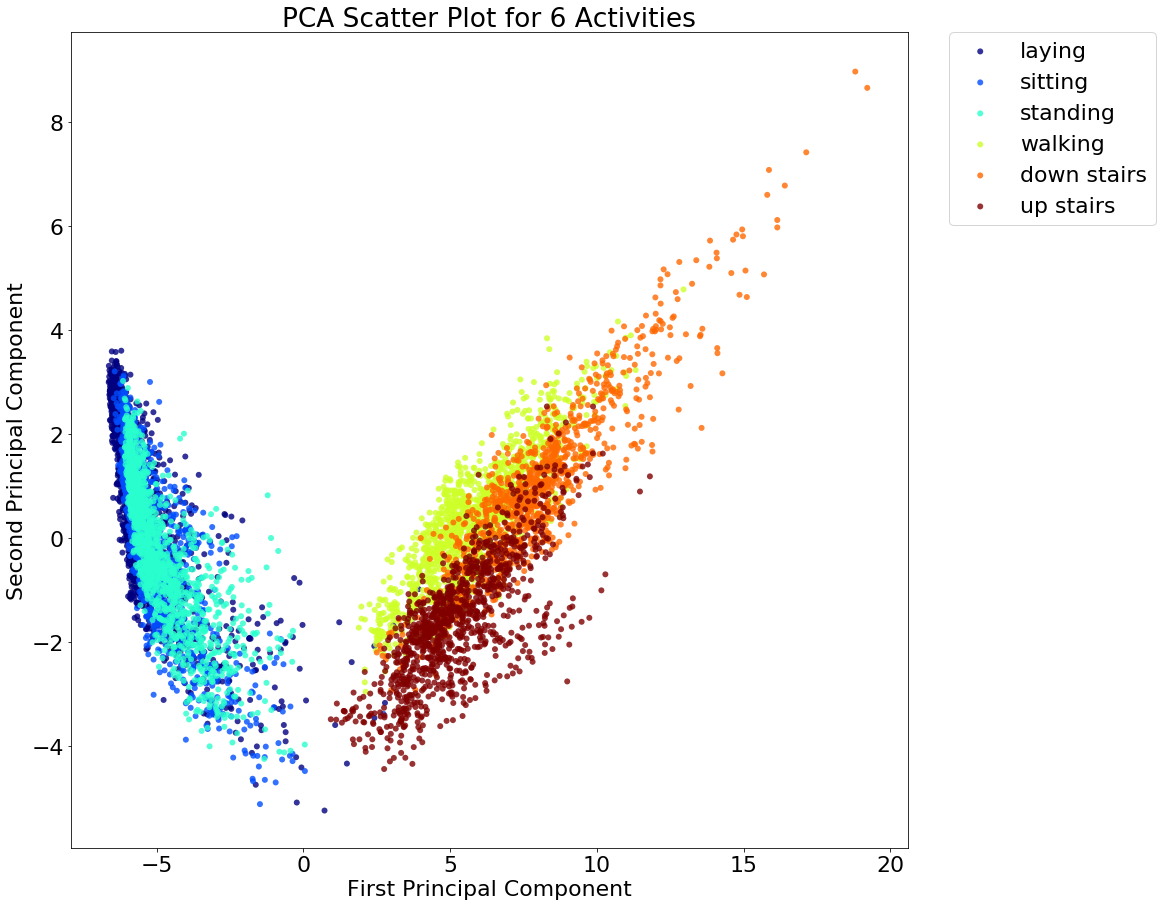

In [162]:
# pca
from sklearn.decomposition import PCA as PCA
import matplotlib.pyplot as plt 
pca = PCA(n_components = 2)
pca_train_x = pca.fit_transform(train_x)
print(pca_train_x)
plt.figure(figsize=(15,15))
font = {'size'   : 22}
plt.rc('font', **font) 
unique = list(set(train_y))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
for i, u in enumerate(unique):
    xi = [pca_train_x[:,0][j] for j  in range(len(pca_train_x[:,0])) if train_y[j] == u]
    yi = [pca_train_x[:,1][j] for j  in range(len(pca_train_x[:,1])) if train_y[j] == u]
    labelx = ""
    if u == 0:
        labelx = "laying"
    elif u == 1:
        labelx = "sitting"
    elif u == 2:
        labelx = "standing"
    elif u == 3:
        labelx = "walking"
    elif u == 4:
        labelx = "down stairs"
    elif u == 5:
        labelx = "up stairs"
    plt.scatter(xi, yi, c=colors[i], label = labelx, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 1))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for 6 Activities")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# #plt.savefig('/Users/zhangsi929/Desktop/pca6.png')

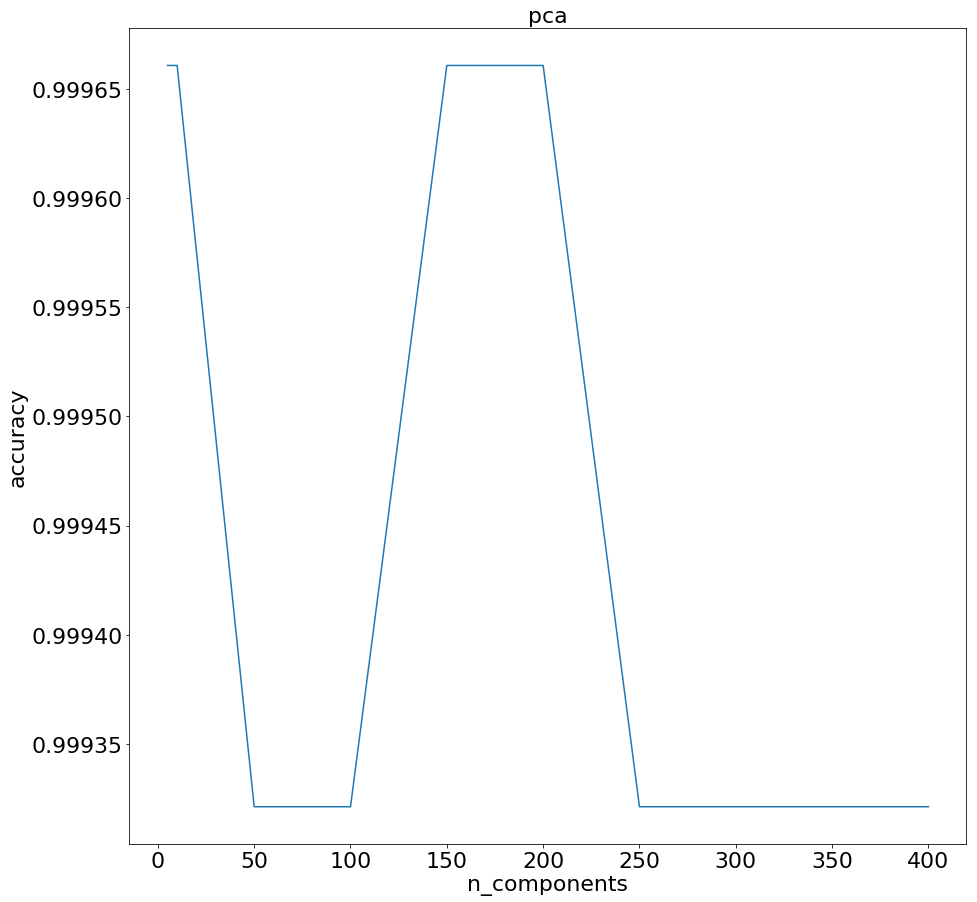

In [83]:
# pca + svm 
from sklearn import svm
from sklearn.metrics import accuracy_score
pcs = [5,10,50,100,150,200,250,300,400]
pca_pc = []
for pcs_num in pcs:
    pca = PCA(n_components = pcs_num)
    pca_train_x = pca.fit_transform(train_x)
    pca_test_x = pca.transform(test_x)
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(pca_train_x, bi_train_y)
    pca_bi_pred_y = clf.predict(pca_test_x)
    pca_pc.append(accuracy_score(bi_test_y,pca_bi_pred_y,))

import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
plt.plot(pcs,pca_pc)
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('pca',fontsize=22)
#plt.savefig('/Users/zhaobi/Desktop/pca.png')
plt.rc('font', **font)

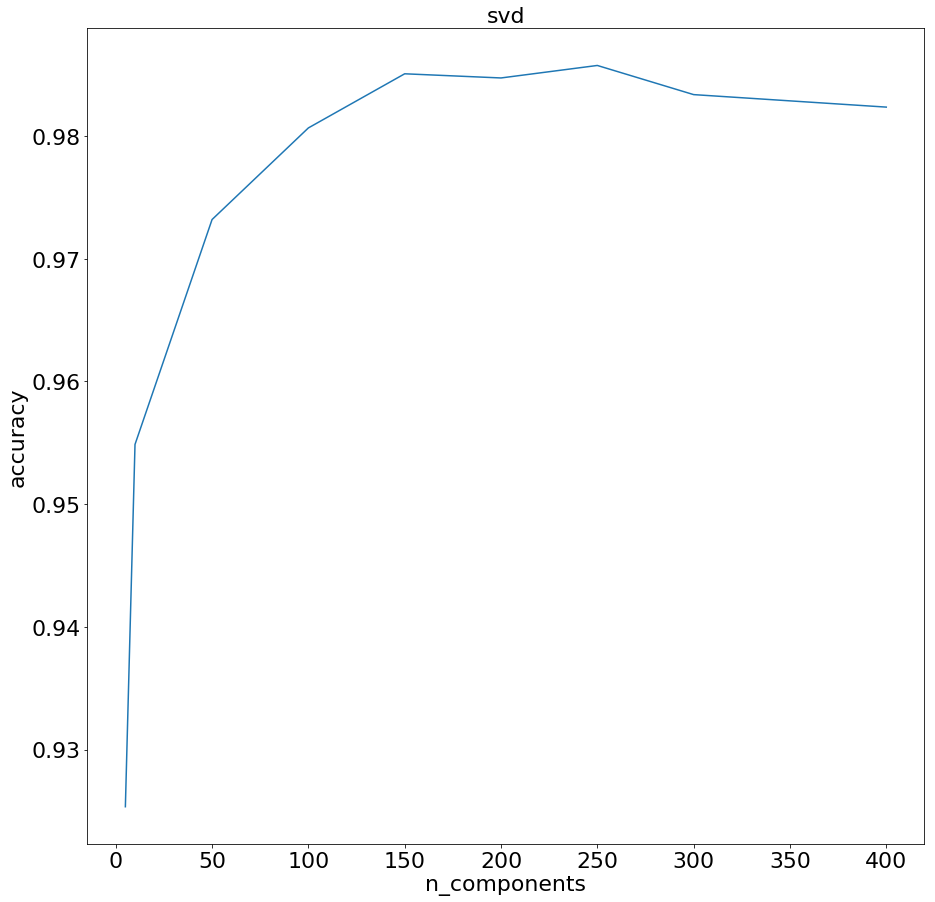

In [12]:
# svd
from sklearn.decomposition import TruncatedSVD
pcs = [5,10,50,100,150,200,250,300,400]
svd_pc = []
for pcs_num in pcs:
    svd = TruncatedSVD(n_components=pcs_num, n_iter=7)
    svd_train_x = svd.fit(train_x).transform(train_x)
    svd_test_x = svd.transform(test_x)
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(svd_train_x, bi_train_y)
    svd_bi_pred_y = clf.predict(svd_test_x)
    svd_pc.append(accuracy_score(bi_test_y,svd_bi_pred_y))
    
import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
plt.plot(pcs,svd_pc)
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('svd',fontsize=22)
#plt.savefig('/Users/zhaobi/Desktop/svd.png')
plt.rc('font', **font)

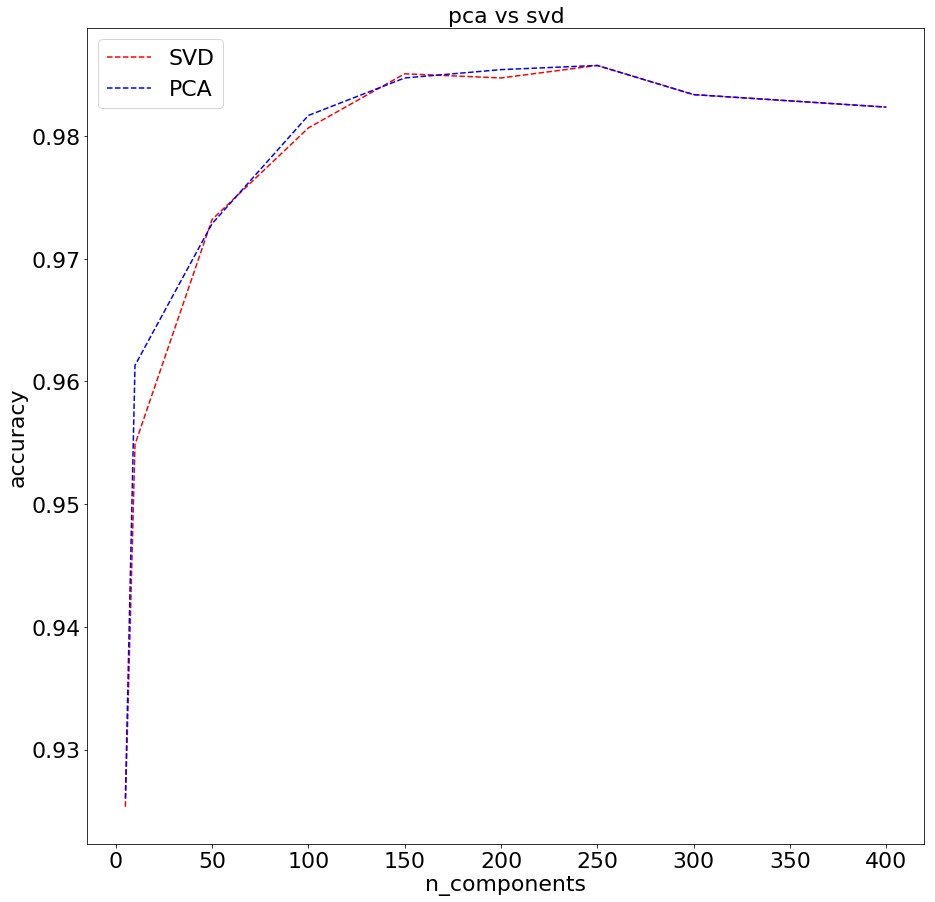

In [61]:
import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
line1,=plt.plot(pcs,svd_pc,'r--',label='SVD')
line2,=plt.plot(pcs,pca_pc,'b--',label='PCA')
plt.xlabel('n_components',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('pca vs svd',fontsize=22)
plt.legend(handles=[line1, line2])
#plt.savefig('/Users/zhaobi/Desktop/pca_svd.png')
plt.rc('font', **font)

In [86]:
# sfs
import pandas as pd
# train_df = pd.read_csv('../input/train.csv')
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
#need to convert array into data frame 
train_x_dataframe = pd.DataFrame(train_x)
train_y_dataframe = pd.DataFrame(train_y)
sfs1 = sfs1.fit(train_x_dataframe, train_y_dataframe)
# pcs = [5,10,50,100,150,200,250,300,400]
# pca_pc = []
# for pcs_num in pcs:
#     pca = PCA(n_components = pcs_num)
#     pca_train_x = pca.fit_transform(train_x)
#     pca_test_x = pca.transform(test_x)
#     clf = svm.SVC(decision_function_shape='ovo')
#     clf.fit(pca_train_x, bi_train_y)
#     pca_bi_pred_y = clf.predict(pca_test_x)
#     pca_pc.append(accuracy_score(bi_test_y,pca_bi_pred_y,))
# import numpy as np
# train_x_arr = np.asarray(train_x)
# bi_train_y_arr = np.asarray(bi_train_y)
# sfs = sfs.fit(train_x_arr, bi_train_y_arr)

TypeError: unhashable type: 'slice'

In [ ]:
# pca, n_component = 200
pca = PCA(n_components = 200)
pca_train_x = pca.fit_transform(train_x)
pca_test_x = pca.transform(test_x)

In [ ]:
# binary svm
from sklearn import svm
from sklearn.metrics import confusion_matrix
svm_pc = []
for kernel in ('poly', 'rbf','linear'):
    clf = svm.SVC(kernel=kernel, gamma=2,probability=True)
    clf = clf.fit(pca_train_x, bi_train_y)
    bi_pred_y = clf.predict(pca_test_x)
    svm_pc.append(accuracy_score(bi_test_y,bi_pred_y))
    
confusion_matrix(bi_test_y, bi_pred_y)

In [ ]:
print('confusion_matrix(linear)')
print(confusion_matrix(bi_test_y, bi_pred_y))

print('ploynomial')
print(svm_pc[0])
print('rbf')
print(svm_pc[1])
print('linear')
print(svm_pc[2])

In [ ]:
# roc cureve (svm), three difference kernel function
from sklearn.metrics import roc_curve, auc
clf = svm.SVC(kernel='linear', gamma=2,probability=True)
clf = clf.fit(pca_train_x, bi_train_y)
bi_pred_y = clf.predict_proba(pca_test_x)
fpr1, tpr1, thresholds = roc_curve(bi_test_y, bi_pred_y[:,1])
svm_roc_auc1 = auc(fpr1, tpr1)

clf = svm.SVC(kernel='poly', gamma=2,probability=True)
clf = clf.fit(pca_train_x, bi_train_y)
bi_pred_y = clf.predict_proba(pca_test_x)
fpr2, tpr2, thresholds = roc_curve(bi_test_y, bi_pred_y[:,1])
svm_roc_auc2 = auc(fpr2, tpr2)

clf = svm.SVC(kernel='rbf', gamma=2,probability=True)
clf = clf.fit(pca_train_x, bi_train_y)
bi_pred_y = clf.predict_proba(pca_test_x)
fpr3, tpr3, thresholds = roc_curve(bi_test_y, bi_pred_y[:,1])
svm_roc_auc3 = auc(fpr3, tpr3)

import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
line1,=plt.plot(fpr1,tpr1,'r--',label='linear')
line2,=plt.plot(fpr2,tpr2,'b--',label='poly')
line3,=plt.plot(fpr3,tpr3,'g--',label='rbf')
plt.legend(handles=[line1, line2,line3])
plt.xlabel('FPR',fontsize=22)
plt.ylabel('TPR',fontsize=22)
plt.title('ROC(SVMs)',fontsize=22)
plt.savefig('/Users/zhaobi/Desktop/ROC(SVMs).png')
plt.rc('font', **font)

In [7]:
# random forest, different number of tree
from sklearn.ensemble import RandomForestClassifier
nTrees = [1,5,10,15,20,50,70,100,150,200]
rf_pc = []
for ntree in nTrees:
    clf = RandomForestClassifier(n_estimators=ntree, max_depth=None, min_samples_split=2, random_state=0)
    clf = clf.fit(pca_train_x, bi_train_y)
    bi_pred_y = clf.predict(pca_test_x)
    rf_pc.append(accuracy_score(bi_test_y,bi_pred_y))

import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
plt.plot(nTrees, rf_pc)
plt.xlabel('nTrees',fontsize=22)
plt.ylabel('accuracy',fontsize=22)
plt.title('random forest',fontsize=22)
plt.savefig('/Users/zhaobi/Desktop/rf.png')

NameError: name 'pca_train_x' is not defined

In [8]:
# roc, random forest, ntree = 70
from sklearn.metrics import roc_curve, auc
clf = RandomForestClassifier(n_estimators=70, max_depth=None, min_samples_split=2, random_state=0)
clf = clf.fit(pca_train_x, bi_train_y)
bi_pred_y = clf.predict_proba(pca_test_x)
fpr, tpr, thresholds = roc_curve(bi_test_y, bi_pred_y[:,1])
rf_roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
font = {'size'   : 22}
plt.rc('font', **font) 
plt.figure(figsize=(15,15))
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize=22)
plt.ylabel('TPR',fontsize=22)
plt.title('ROC(RF)',fontsize=22)
plt.savefig('/Users/zhaobi/Desktop/ROC(RF).png')
plt.rc('font', **font)

NameError: name 'pca_train_x' is not defined

In [ ]:
# binary ann
import keras
from keras.models import Sequential
from keras.layers import Dense
nn_classifier = Sequential()
# Adding the input layer and the first hidden layer
ann_classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 561))
# Adding the second hidden layer
ann_classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
ann_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



ann_classifier.fit(np.array(train_x), np.array(bi_train_y), batch_size = 10, epochs = 50)

# fit data in ann classifier
ann_pred = ann_classifier.predict(np.array(test_x))
bi_ann_pred = []
# binarize the output and computer cm
for i in range(0,len(ann_pred)):
    if ann_pred[i] > 0.5:
        bi_ann_pred.append(1)
    elif ann_pred[i] <= 0.5:
        bi_ann_pred.append(0)
confusion_matrix(bi_ann_pred, bi_pred_y)